# Regression Tree (Hitters Data)

회귀 문제를 해결하는 Decision Tree의 경우 terminal node의 종속변수(y)의 평균을 예측값으로 반환하게 된다.    
예측 값의 종류는 terminal node 개수와 일치한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

## 1. Load Datasets

In [2]:
hitters_data = pd.read_csv('./data/Hitters.csv', index_col=0)
hitters_data.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A


In [3]:
hitters_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

## 2. PreProcessing

In [4]:
# Null 값 제거
hitters_data.dropna(how='any', inplace=True)
hitters_data.shape

(263, 20)

In [5]:
# Salary(y값) log변환
hitters_data['Salary'] = np.log(hitters_data['Salary'])
hitters_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A


## 3. Decision Tree

Decision Tree는 계산의 복잡성 대비 높은 예측 성능을 내는 것으로 알려져 있으며, 변수 단위로 설명력을 가진다는 것이 장점이다. 하지만, 결정경계(decision boundary)가 데이터 축에 수직이기 때문에 특정 데이터에서만 잘 작동하는 편이다. 이러한 문제를 해결하는 것이 Random Forest이다.

In [6]:
# Decision Tree 테스트
# 두 가지의 변수 만으로 Decision Tree 학습
X = hitters_data[['Years', 'Hits']]
y = hitters_data[['Salary']]

regr_tree = tree.DecisionTreeRegressor(max_leaf_nodes=3)
regr_tree.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

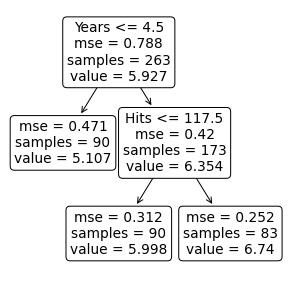

In [39]:
# 트리 구조 시각화
plt.figure(figsize=(5, 5))
tree.plot_tree(regr_tree, 
               feature_names=X.columns, 
               rounded=True)
plt.show()

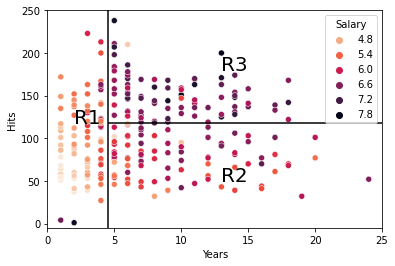

In [51]:
# 데이터 분기 시각화

# 산포도 그리기
palette = sns.color_palette("rocket_r", as_cmap=True)
g = sns.scatterplot(x='Years', y='Hits', hue='Salary', data=hitters_data, palette=palette)
g.set(xlim=(0, 25), ylim=(-5, 250))

# 트리 분기 라인 시각화
plt.vlines(4.5,  ymin=-5, ymax=250, colors='black')
plt.hlines(117.5, xmin=4.5, xmax=25, colors='black')
plt.annotate('R1', xy=(2, 117.5), fontsize=20)
plt.annotate('R2', xy=(13, 50), fontsize=20)
plt.annotate('R3', xy=(13, 180), fontsize=20)
plt.show()

----

**TIP)** *Decision Tree의 분기*

Decision Tree는 순도(Homogeneity)가 증가, 불순도(Impurity) 혹은 불확실성(Uncertainty)가 최대한 감소하는 방향으로 학습을 진행한다.    
이때, 분기에 사용하는 지표는 분류에서는 엔트로피(Entropy), 지니계수(Gini Index) 두 가지와 회귀에서는 MSE(Mean Squared Error)가 대표적이다.
    
- 범주형
1. 엔트로피 (Entropy)    
$Entropy(A) = -\sum_{k=1}^{m}P_{k}\log_{2}(P_{k})$   
     

2. 지니계수 (Gini Index)     
$G.I(A) = \sum^{d}_{i=1}(R_{i}(1 - \sum^{m}_{k=1}p^{2}_{ik}))$

분류 문제의 지표 두 가지 모두 0.5(범주가 반반씩 섞여 있는 형태)에서 불순도가 최대가 되며 하나의 범주 만으로 분할 되었을 때 불순도가 최소가 된다. 아래 그림의 오분류오차(misclassification error)의 경우 미분이 불가능한 지표이므로 잘 사용하지 않는다.

<img src='./image/entropy_gi.png' width=400 height=400>

- 수치형
1. MSE (Mean Squared Error)   
$MSE = \frac{1}{n}\sum^{n}_{i=1}(y_{i}-\hat{y_{i}})^{2}$    

회귀의 경우 선형 회귀와 마찬가지로 MSE가 최소가 되는 방향으로 모델 학습이 이루어진다. 

----

In [53]:
# 모든 변수를 활용한 Decision Tree